In [1]:
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import matplotlib.pyplot as plt
from scipy import stats 
import requests
import pandas as pd
import seaborn as sns
import math

In [2]:
cc1=pd.read_csv("cc1.csv")
cc2=pd.read_csv("cc2.csv")
cc3=pd.read_csv("cc3.csv",encoding="gbk")
cc4=pd.read_csv("cc4.csv",encoding="gbk")

In [3]:
cc1=cc1.drop_duplicates()
cc2=cc2.drop_duplicates()
cc3=cc3.drop_duplicates()
cc4=cc4.drop_duplicates()

In [4]:
cc1=cc1.dropna()
cc2=cc2.dropna()
cc3=cc3.dropna()
cc4=cc4.dropna()


In [5]:
cc5=cc1[(cc1["csny"]>=("1918/01/01"))&(cc1["csny"]<=("2018/01/01"))]  
#年龄异常


In [6]:

cc6=cc2.loc[cc2["sj"]*cc2["sl"] >= cc2["je"] ]
cc7=cc3.loc[cc3["sj"]*cc3["sl"]>=cc3["je"]]
#金额异常

In [7]:
cc8=cc5.loc[cc5["kh"].str.contains('\w{8}')]

#kh 是8位的

In [8]:
cc9=pd.merge(cc7,cc8,on = "kh")
#cc9 kh 会员卡号

cc10=pd.merge(cc7,cc6,on=["djh","dtime","spbm","je"])
#cc10 本店
cc10


,kh,dtime,spbm,sl_x,sj_x,je,spmc,jf,syjh_x,djh,gzbm,gzmc,sj_y,sl_y,syjh_y
0,5bfd4a2e,2016/5/8 11:32,9096d06f,1,1250.0,1125.0,素然B价件,0.0,232,25bb,3268,ZUCZUG,1250.0,1,232
1,0a69471f,2016/5/8 13:40,9096d06f,1,1850.0,1665.0,素然B价件,0.0,232,fcd0,3268,ZUCZUG,1850.0,1,232
2,0a69471f,2016/5/8 13:40,9096d06f,1,695.0,625.5,素然B价件,0.0,232,fcd0,3268,ZUCZUG,695.0,1,232
3,49e89b58,2016/5/8 14:08,9096d06f,1,1300.0,1170.0,素然B价件,0.0,232,7cd8,3268,ZUCZUG,1300.0,1,232
4,49e89b58,2016/5/8 14:08,9096d06f,1,1400.0,1260.0,素然B价件,0.0,232,7cd8,3268,ZUCZUG,1400.0,1,232
5,49e89b58,2016/5/8 14:08,9096d06f,1,545.0,490.5,素然B价件,0.0,232,7cd8,3268,ZUCZUG,545.0,1,232
6,49e89b58,2016/5/8 14:08,9096d06f,1,1700.0,1530.0,素然B价件,0.0,232,7cd8,3268,ZUCZUG,1700.0,1,232
7,f0b36fcc,2016/5/8 14:54,9096d06f,1,1150.0,1035.0,素然B价件,0.0,232,95b0,3268,ZUCZUG,1150.0,1,232
8,f0b36fcc,2016/5/8 14:54,9096d06f,1,595.0,535.5,素然B价件,0.0,232,95b0,3268,ZUCZUG,595.0,1,232
9,f0b36fcc,2016/5/8 14:54,9096d06f,1,795.0,715.5,素然B价件,0.0,232,95b0,3268,ZUCZUG,795.0,1,232


In [9]:
cc10.sort_values(['dtime'],inplace=True)
cc10.reset_index(drop=True,inplace=True)


cc10


,kh,dtime,spbm,sl_x,sj_x,je,spmc,jf,syjh_x,djh,gzbm,gzmc,sj_y,sl_y,syjh_y
0,ec515296,2016/1/11 12:02,6181328c,1,3976.0,3976.0,VIVINIKOC件,3976.00,16,25bb,3265,III VIVINIKO,3976.0,1,16
1,1f8bf4fd,2016/1/11 12:24,c8fef99d,1,898.0,898.0,CARBANNIA D件,898.00,17,25bb,3340,CARBANNIA（卡邦尼）,898.0,1,17
2,1f8bf4fd,2016/1/11 12:24,e8ff9299,1,2208.0,2208.0,CARBANNIA A件,2208.00,17,25bb,3340,CARBANNIA（卡邦尼）,2208.0,1,17
3,37d4e35e,2016/1/11 12:29,12c40a6a,2,270.0,200.0,兰蔻唇膏/玫瑰唇釉.,200.00,43,d399,8064,LANCOME,270.0,2,43
4,eeb1fc21,2016/1/11 12:39,18e8fbe6,1,876.0,876.0,DKNY F件,876.00,11,fcd0,2283,DKNY 柜,876.0,1,11
5,df3ed0b6,2016/1/11 12:51,60f4ccdb,1,13512.0,13512.0,周大福黄金系列正价件,5821.15,43,2954,8049,周大福柜,13512.0,1,43
6,df3ed0b6,2016/1/11 12:51,22f9c78e,1,5580.0,5580.0,宝姿男装系列授卡A件,2403.95,43,2954,1155,PORTS,5580.0,1,43
7,df3ed0b6,2016/1/11 12:51,22f9c78e,1,4410.0,4410.0,宝姿男装系列授卡A件,1899.90,43,2954,1155,PORTS,4410.0,1,43
8,ef979b3e,2016/1/11 12:53,86fbe562,1,390.0,390.0,兰蔻睫毛膏.,390.00,43,fc11,8064,LANCOME,390.0,1,43
9,ef979b3e,2016/1/11 12:54,80985cb4,1,45.0,45.0,植村秀感光珍珠蜜粉扑/五角形海绵1,45.00,43,ae2b,8156,Shu Uemura,45.0,1,43


In [10]:
fl = cc10.groupby('kh')["je"].mean()
#fl 购买平均金额
sl= cc10.groupby('kh')["je"].max()
#sl 购买最高金额

hl= cc10.groupby('kh')["je"].count()
#hl 每个会员的购买频次


In [11]:
q= cc10.groupby('gzbm')["je"].count()

 


In [15]:
cc10

,kh,dtime,spbm,sl_x,sj_x,je,spmc,jf,syjh_x,djh,gzbm,gzmc,sj_y,sl_y,syjh_y
0,ec515296,2016/1/11 12:02,6181328c,1,3976.0,3976.0,VIVINIKOC件,3976.00,16,25bb,3265,III VIVINIKO,3976.0,1,16
1,1f8bf4fd,2016/1/11 12:24,c8fef99d,1,898.0,898.0,CARBANNIA D件,898.00,17,25bb,3340,CARBANNIA（卡邦尼）,898.0,1,17
2,1f8bf4fd,2016/1/11 12:24,e8ff9299,1,2208.0,2208.0,CARBANNIA A件,2208.00,17,25bb,3340,CARBANNIA（卡邦尼）,2208.0,1,17
3,37d4e35e,2016/1/11 12:29,12c40a6a,2,270.0,200.0,兰蔻唇膏/玫瑰唇釉.,200.00,43,d399,8064,LANCOME,270.0,2,43
4,eeb1fc21,2016/1/11 12:39,18e8fbe6,1,876.0,876.0,DKNY F件,876.00,11,fcd0,2283,DKNY 柜,876.0,1,11
5,df3ed0b6,2016/1/11 12:51,60f4ccdb,1,13512.0,13512.0,周大福黄金系列正价件,5821.15,43,2954,8049,周大福柜,13512.0,1,43
6,df3ed0b6,2016/1/11 12:51,22f9c78e,1,5580.0,5580.0,宝姿男装系列授卡A件,2403.95,43,2954,1155,PORTS,5580.0,1,43
7,df3ed0b6,2016/1/11 12:51,22f9c78e,1,4410.0,4410.0,宝姿男装系列授卡A件,1899.90,43,2954,1155,PORTS,4410.0,1,43
8,ef979b3e,2016/1/11 12:53,86fbe562,1,390.0,390.0,兰蔻睫毛膏.,390.00,43,fc11,8064,LANCOME,390.0,1,43
9,ef979b3e,2016/1/11 12:54,80985cb4,1,45.0,45.0,植村秀感光珍珠蜜粉扑/五角形海绵1,45.00,43,ae2b,8156,Shu Uemura,45.0,1,43


In [20]:

import datetime
cc10["dtime"]=pd.to_datetime(cc10["dtime"])
cc10['天数差']=(pd.to_datetime('2018/01/03')-cc10['dtime']).dt.days
cc10

,kh,dtime,spbm,sl_x,sj_x,je,spmc,jf,syjh_x,djh,gzbm,gzmc,sj_y,sl_y,syjh_y,天数差
0,ec515296,2016-01-11 12:02:00,6181328c,1,3976.0,3976.0,VIVINIKOC件,3976.00,16,25bb,3265,III VIVINIKO,3976.0,1,16,722
1,1f8bf4fd,2016-01-11 12:24:00,c8fef99d,1,898.0,898.0,CARBANNIA D件,898.00,17,25bb,3340,CARBANNIA（卡邦尼）,898.0,1,17,722
2,1f8bf4fd,2016-01-11 12:24:00,e8ff9299,1,2208.0,2208.0,CARBANNIA A件,2208.00,17,25bb,3340,CARBANNIA（卡邦尼）,2208.0,1,17,722
3,37d4e35e,2016-01-11 12:29:00,12c40a6a,2,270.0,200.0,兰蔻唇膏/玫瑰唇釉.,200.00,43,d399,8064,LANCOME,270.0,2,43,722
4,eeb1fc21,2016-01-11 12:39:00,18e8fbe6,1,876.0,876.0,DKNY F件,876.00,11,fcd0,2283,DKNY 柜,876.0,1,11,722
5,df3ed0b6,2016-01-11 12:51:00,60f4ccdb,1,13512.0,13512.0,周大福黄金系列正价件,5821.15,43,2954,8049,周大福柜,13512.0,1,43,722
6,df3ed0b6,2016-01-11 12:51:00,22f9c78e,1,5580.0,5580.0,宝姿男装系列授卡A件,2403.95,43,2954,1155,PORTS,5580.0,1,43,722
7,df3ed0b6,2016-01-11 12:51:00,22f9c78e,1,4410.0,4410.0,宝姿男装系列授卡A件,1899.90,43,2954,1155,PORTS,4410.0,1,43,722
8,ef979b3e,2016-01-11 12:53:00,86fbe562,1,390.0,390.0,兰蔻睫毛膏.,390.00,43,fc11,8064,LANCOME,390.0,1,43,722
9,ef979b3e,2016-01-11 12:54:00,80985cb4,1,45.0,45.0,植村秀感光珍珠蜜粉扑/五角形海绵1,45.00,43,ae2b,8156,Shu Uemura,45.0,1,43,722


cc10

In [12]:
import matplotlib.pyplot as plt
plt.pie(q)


([<matplotlib.patches.Wedge at 0x1acb790e400>,
 [Text(1.0999526228208811, 0.010209189461672952, ''),
  Text(1.0995991117149824, 0.029695008261021956, ''),
  Text(1.0990191798975102, 0.04644181539737923, ''),
  Text(1.097768722124819, 0.07002737125183582, ''),
  Text(1.0961412952666174, 0.09205574838771509, ''),
  Text(1.0945862301825158, 0.10899992979276994, ''),
  Text(1.0933744117696618, 0.12055038650848864, ''),
  Text(1.0925768187775202, 0.1275770162293897, ''),
  Text(1.091799777916831, 0.13406433135162715, ''),
  Text(1.090200094048998, 0.14650513620879038, ''),
  Text(1.0884586547840176, 0.15892689144939168, ''),
  Text(1.0884566354838172, 0.15894072062013886, ''),
  Text(1.0884546160079132, 0.15895454976522913, ''),
  Text(1.0884525963563059, 0.15896837888466028, ''),
  Text(1.0884505765289958, 0.15898220797843005, ''),
  Text(1.088225283609167, 0.1605170773274545, ''),
  Text(1.0858176199578373, 0.17606844177505965, ''),
  Text(1.0820595951105108, 0.19785609070553664, ''),
  T

In [13]:
aa1= dict((aaa, bb.count(aaa)) for aaa in bb)

print(aa1)

NameError: name 'bb' is not defined

In [ ]:
key=aa1.keys()

value=aa1.values()

print(key)

print(value)

alist=list(zip(key,value))

print(alist)

In [ ]:
alist

In [1]:
import xlrd

workbook = xlrd.open_workbook("问题2.xlsx")
sheets = workbook.sheet_names()

print(workbook.nsheets)
num = workbook.nsheets
# 返回的结果集
for i in range(num):
    sheet = workbook.sheets()[i]
    #python3.8用法
    print(f'第 {str(i + 1)} 个sheet:  {sheet.name} ')
    rows = sheet.nrows
    for i in range(rows):
        print(sheet.row_values(i))

5
第 1 个sheet:  地区 
['序号', '客户城市']
[1.0, '广州市']
[2.0, '上海市']
[3.0, '北京市']
[4.0, '杭州市']
[5.0, '天津市']
[6.0, '武汉市']
[7.0, '南京市']
[8.0, '石家庄市']
[9.0, '南昌市']
第 2 个sheet:  产品 
['序号', '产品类别', '产品名称', '产品代码', '零售价', '采购价', '单位利润']
[1.0, '手机配件', '手机壳', 'sj001', 26.0, 12.0, 14.0]
[2.0, '手机配件', '耳机', 'sj002', 109.0, 58.0, 51.0]
[3.0, '手机配件', '充电宝', 'sj003', 119.0, 66.0, 53.0]
[4.0, '手机配件', '贴膜', 'sj004', 29.0, 10.0, 19.0]
[5.0, '手机配件', '数据线', 'sj005', 19.0, 12.0, 7.0]
[6.0, '电脑外设', '鼠标', 'dn006', 78.0, 56.0, 22.0]
[7.0, '电脑外设', '键盘', 'dn007', 85.0, 59.0, 26.0]
[8.0, '电脑外设', '鼠标垫', 'dn008', 69.0, 39.0, 30.0]
[9.0, '电脑外设', 'U盘', 'dn009', 49.0, 29.0, 20.0]
[10.0, '电脑外设', '硬盘', 'dn010', 349.0, 235.0, 114.0]
[11.0, '智能设备', '智能手表', 'zn011', 199.0, 148.0, 51.0]
[12.0, '智能设备', '智能手环', 'zn012', 249.0, 188.0, 61.0]
[13.0, '智能设备', 'VR眼睛', 'zn013', 899.0, 460.0, 439.0]
第 3 个sheet:  客户 
['序号', '客户姓名', '客户代码', '客户城市']
[1.0, '崔辉', 'kh001', '广州市']
[2.0, '吴丽', 'kh002', '北京市']
[3.0, '王鹤', 'kh003', '上海市']
[4.0, '何琳'

[42621.0, 'xs001625', '智能手表', '孙争', '杭州市', 42623.0, 1.0, 199.0, 199.0, 51.0, 51.0]
[42621.0, 'xs001626', '智能手表', '刘永', '上海市', 42623.0, 2.0, 398.0, 199.0, 51.0, 102.0]
[42621.0, 'xs001627', '贴膜', '贾晨', '北京市', 42622.0, 1.0, 29.0, 29.0, 19.0, 19.0]
[42621.0, 'xs001628', '鼠标', '薛丽', '北京市', 42621.0, 2.0, 156.0, 78.0, 22.0, 44.0]
[42621.0, 'xs001629', '键盘', '黄苏', '上海市', 42621.0, 1.0, 85.0, 85.0, 26.0, 26.0]
[42621.0, 'xs001630', '贴膜', '张晨', '北京市', 42621.0, 1.0, 29.0, 29.0, 19.0, 19.0]
[42621.0, 'xs001631', '智能手环', '赖博', '北京市', 42621.0, 1.0, 249.0, 249.0, 61.0, 61.0]
[42621.0, 'xs001632', '数据线', '赖新', '北京市', 42623.0, 1.0, 19.0, 19.0, 7.0, 7.0]
[42621.0, 'xs001633', '手机壳', '郑争', '上海市', 42621.0, 1.0, 26.0, 26.0, 14.0, 14.0]
[42621.0, 'xs001634', '智能手环', '薛楠', '武汉市', 42622.0, 1.0, 249.0, 249.0, 61.0, 61.0]
[42621.0, 'xs001635', '贴膜', '李东', '上海市', 42622.0, 2.0, 58.0, 29.0, 19.0, 38.0]
[42621.0, 'xs001636', '数据线', '颜东', '广州市', 42623.0, 1.0, 19.0, 19.0, 7.0, 7.0]
[42621.0, 'xs001637', '耳机', '王杰', '

[42799.0, 'xs004893', '智能手表', '颜永', '广州市', 42799.0, 1.0, 199.0, 199.0, 51.0, 51.0]
[42799.0, 'xs004894', '智能手表', '周菲', '广州市', 42799.0, 1.0, 199.0, 199.0, 51.0, 51.0]
[42799.0, 'xs004895', '数据线', '孙鹏', '广州市', 42800.0, 1.0, 19.0, 19.0, 7.0, 7.0]
[42799.0, 'xs004896', '充电宝', '贾娜', '武汉市', 42800.0, 1.0, 119.0, 119.0, 53.0, 53.0]
[42799.0, 'xs004897', '硬盘', '何博', '杭州市', 42799.0, 1.0, 349.0, 349.0, 114.0, 114.0]
[42799.0, 'xs004898', '智能手环', '马鹤', '杭州市', 42799.0, 1.0, 249.0, 249.0, 61.0, 61.0]
[42799.0, 'xs004899', '充电宝', '王歌', '武汉市', 42800.0, 1.0, 119.0, 119.0, 53.0, 53.0]
[42799.0, 'xs004900', '手机壳', '齐石', '武汉市', 42801.0, 1.0, 26.0, 26.0, 14.0, 14.0]
[42799.0, 'xs004901', '耳机', '赖鹤', '天津市', 42799.0, 1.0, 109.0, 109.0, 51.0, 51.0]
[42799.0, 'xs004902', '硬盘', '张平', '上海市', 42799.0, 1.0, 349.0, 349.0, 114.0, 114.0]
[42799.0, 'xs004903', '键盘', '赖东', '北京市', 42801.0, 1.0, 85.0, 85.0, 26.0, 26.0]
[42799.0, 'xs004904', '鼠标', '马苏', '上海市', 42800.0, 1.0, 78.0, 78.0, 22.0, 22.0]
[42799.0, 'xs004905', '硬

[42935.0, 'xs008119', '手机壳', '周东', '北京市', 42937.0, 1.0, 26.0, 26.0, 14.0, 14.0]
[42935.0, 'xs008120', '智能手表', '吴菲', '广州市', 42935.0, 1.0, 199.0, 199.0, 51.0, 51.0]
[42935.0, 'xs008121', '鼠标垫', '郑炎', '天津市', 42937.0, 2.0, 138.0, 69.0, 30.0, 60.0]
[42935.0, 'xs008122', '耳机', '钱晶', '南昌市', 42937.0, 2.0, 218.0, 109.0, 51.0, 102.0]
[42935.0, 'xs008123', '充电宝', '张苏', '南京市', 42935.0, 1.0, 119.0, 119.0, 53.0, 53.0]
[42935.0, 'xs008124', '键盘', '孙石', '上海市', 42937.0, 1.0, 85.0, 85.0, 26.0, 26.0]
[42935.0, 'xs008125', '手机壳', '赵丽', '上海市', 42937.0, 1.0, 26.0, 26.0, 14.0, 14.0]
[42935.0, 'xs008126', '硬盘', '邱晨', '北京市', 42936.0, 2.0, 698.0, 349.0, 114.0, 228.0]
[42935.0, 'xs008127', '鼠标垫', '贾娟', '杭州市', 42936.0, 2.0, 138.0, 69.0, 30.0, 60.0]
[42935.0, 'xs008128', '贴膜', '崔东', '上海市', 42936.0, 2.0, 58.0, 29.0, 19.0, 38.0]
[42935.0, 'xs008129', 'U盘', '郑苏', '广州市', 42936.0, 2.0, 98.0, 49.0, 20.0, 40.0]
[42935.0, 'xs008130', '手机壳', '马楠', '北京市', 42936.0, 1.0, 26.0, 26.0, 14.0, 14.0]
[42935.0, 'xs008131', 'U盘', '薛菲

[43042.0, 'xs011561', '贴膜', '颜博', '上海市', 43042.0, 1.0, 29.0, 29.0, 19.0, 19.0]
[43042.0, 'xs011562', '鼠标', '崔凡', '武汉市', 43042.0, 1.0, 78.0, 78.0, 22.0, 22.0]
[43042.0, 'xs011563', '耳机', '林晨', '杭州市', 43042.0, 1.0, 109.0, 109.0, 51.0, 51.0]
[43042.0, 'xs011564', 'U盘', '钱红', '广州市', 43044.0, 1.0, 49.0, 49.0, 20.0, 20.0]
[43042.0, 'xs011565', '智能手表', '陈娟', '广州市', 43043.0, 1.0, 199.0, 199.0, 51.0, 51.0]
[43042.0, 'xs011566', '鼠标垫', '王楠', '北京市', 43042.0, 1.0, 69.0, 69.0, 30.0, 30.0]
[43042.0, 'xs011567', '鼠标', '蔡涛', '南京市', 43042.0, 1.0, 78.0, 78.0, 22.0, 22.0]
[43042.0, 'xs011568', '手机壳', '薛炎', '天津市', 43043.0, 1.0, 26.0, 26.0, 14.0, 14.0]
[43042.0, 'xs011569', '耳机', '颜鹤', '上海市', 43043.0, 1.0, 109.0, 109.0, 51.0, 51.0]
[43042.0, 'xs011570', '鼠标垫', '薛东', '北京市', 43043.0, 1.0, 69.0, 69.0, 30.0, 30.0]
[43042.0, 'xs011571', '手机壳', '徐红', '杭州市', 43042.0, 1.0, 26.0, 26.0, 14.0, 14.0]
[43042.0, 'xs011572', 'U盘', '马敏', '杭州市', 43044.0, 1.0, 49.0, 49.0, 20.0, 20.0]
[43042.0, 'xs011573', 'VR眼睛', '贾东', '广州市

In [24]:
sheet

In [2]:
cc1=pd.read_excel("问题2.xlsx")
cc2=pd.read_csv("问题21.csv",encoding="gbk")
cc3=pd.read_csv("问题23.csv",encoding="gbk")
cc4=pd.read_csv("问题24.csv",encoding="gbk")
cc5=pd.read_csv("问题25.csv",encoding="gbk")


In [30]:
cc6=pd.merge(cc1,cc2)
cc6

,序号,客户城市,产品类别,产品名称,产品代码,零售价,采购价,单位利润
0,1,广州市,手机配件,手机壳,sj001,26,12,14
1,2,上海市,手机配件,耳机,sj002,109,58,51
2,3,北京市,手机配件,充电宝,sj003,119,66,53
3,4,杭州市,手机配件,贴膜,sj004,29,10,19
4,5,天津市,手机配件,数据线,sj005,19,12,7
5,6,武汉市,电脑外设,鼠标,dn006,78,56,22
6,7,南京市,电脑外设,键盘,dn007,85,59,26
7,8,石家庄市,电脑外设,鼠标垫,dn008,69,39,30
8,9,南昌市,电脑外设,U盘,dn009,49,29,20


In [29]:
cc6

,序号,客户城市,产品类别,产品名称,产品代码,零售价,采购价,单位利润
0,1,广州市,手机配件,手机壳,sj001,26,12,14
1,2,上海市,手机配件,耳机,sj002,109,58,51
2,3,北京市,手机配件,充电宝,sj003,119,66,53
3,4,杭州市,手机配件,贴膜,sj004,29,10,19
4,5,天津市,手机配件,数据线,sj005,19,12,7
5,6,武汉市,电脑外设,鼠标,dn006,78,56,22
6,7,南京市,电脑外设,键盘,dn007,85,59,26
7,8,石家庄市,电脑外设,鼠标垫,dn008,69,39,30
8,9,南昌市,电脑外设,U盘,dn009,49,29,20


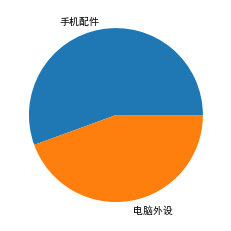

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.pie(cc6["产品类别"].value_counts(), labels=cc6["产品类别"].drop_duplicates())
plt.show()


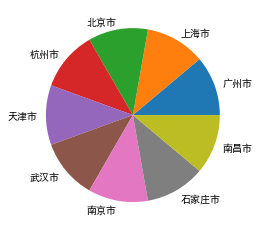

In [28]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.pie(cc6["客户城市"].value_counts(), labels=cc6["客户城市"])
plt.show()



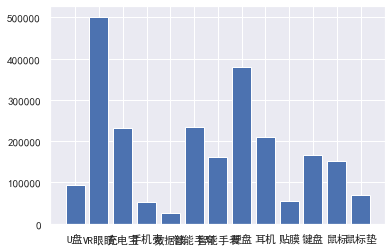

In [39]:

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
plt.bar(cc4.groupby("产品名称")["销售额"].sum().index,cc4.groupby("产品名称")["销售额"].sum())
plt.show()

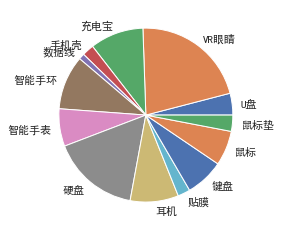

In [57]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
labels='U盘','VR眼睛','充电宝','手机壳','数据线','智能手环','智能手表','硬盘','耳机','贴膜','键盘','鼠标','鼠标垫'
plt.pie(cc4.groupby("产品名称")["销售额"].sum(),labels=labels)
plt.show()

In [56]:
ss=cc4.groupby("产品名称")["销售额"].sum().index
ss

Index(['U盘', 'VR眼睛', '充电宝', '手机壳', '数据线', '智能手环', '智能手表', '硬盘', '耳机', '贴膜',
       '键盘', '鼠标', '鼠标垫'],
      dtype='object', name='产品名称')

In [10]:

cc4["产品名称"].value_counts().index

Index(['充电宝', '手机壳', '键盘', '耳机', 'U盘', '鼠标', '贴膜', '数据线', '硬盘', '鼠标垫', '智能手环',
       '智能手表', 'VR眼睛'],
      dtype='object')

In [11]:
cc1

,序号,客户城市
0,1,广州市
1,2,上海市
2,3,北京市
3,4,杭州市
4,5,天津市
5,6,武汉市
6,7,南京市
7,8,石家庄市
8,9,南昌市


In [13]:
cc2


,序号,产品类别,产品名称,产品代码,零售价,采购价,单位利润
0,1,手机配件,手机壳,sj001,26,12,14
1,2,手机配件,耳机,sj002,109,58,51
2,3,手机配件,充电宝,sj003,119,66,53
3,4,手机配件,贴膜,sj004,29,10,19
4,5,手机配件,数据线,sj005,19,12,7
5,6,电脑外设,鼠标,dn006,78,56,22
6,7,电脑外设,键盘,dn007,85,59,26
7,8,电脑外设,鼠标垫,dn008,69,39,30
8,9,电脑外设,U盘,dn009,49,29,20
9,10,电脑外设,硬盘,dn010,349,235,114


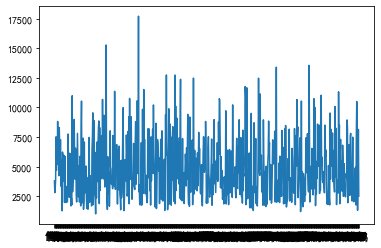

In [66]:
cc3
#12
cc7=pd.merge(cc3,cc4,on="客户姓名")
plt.plot(cc7.groupby("客户姓名")["总金额"].sum().index,cc7.groupby("客户姓名")["总金额"].sum())
plt.show()

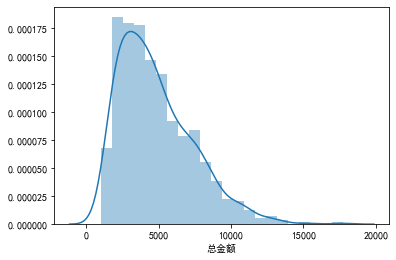

In [70]:
sns.distplot(cc7.groupby("客户姓名")["总金额"].sum())
plt.show()

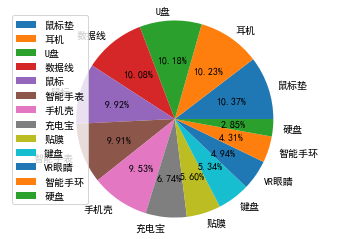

In [15]:
#9
plt.pie(cc4["产品名称"].value_counts(), labels=cc4["产品名称"].drop_duplicates(),autopct='%1.2f%%')
plt.axis('equal')
plt.legend(loc='best')
plt.show()

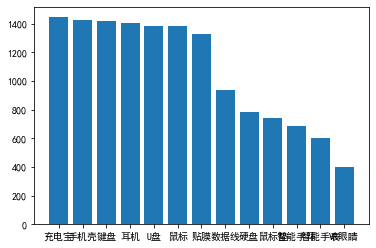

<Figure size 37440x7200 with 0 Axes>

In [16]:
#9

plt.bar(cc4["产品名称"].value_counts().index,cc4["产品名称"].value_counts())
plt.figure(figsize=(520,100)) 
plt.show()

In [67]:
cc4

,订单日期,订单号,产品名称,客户姓名,客户城市,发货日期,数量,销售额,单价,毛利,利润
0,2016/1/1,xs000001,鼠标垫,郑石,北京市,2016/1/3,2,138,69,30,60
1,2016/1/1,xs000001,耳机,吴雷,北京市,2016/1/1,1,109,109,20,20
2,2016/1/2,xs000002,U盘,林永,杭州市,2016/1/3,1,49,49,51,51
3,2016/1/2,xs000003,耳机,徐雷,上海市,2016/1/2,1,109,109,20,20
4,2016/1/2,xs000002,数据线,薛平,北京市,2016/1/3,1,19,19,7,7
5,2016/1/2,xs000003,鼠标,薛鹏,武汉市,2016/1/4,1,78,78,51,51
6,2016/1/3,xs000027,U盘,孙静,上海市,2016/1/4,1,49,49,20,20
7,2016/1/3,xs000027,鼠标,郑凡,北京市,2016/1/4,1,78,78,22,22
8,2016/1/4,xs000028,数据线,赖敏,石家庄市,2016/1/5,2,38,19,53,106
9,2016/1/4,xs000028,鼠标垫,徐楠,杭州市,2016/1/4,1,69,69,22,22


D:\anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


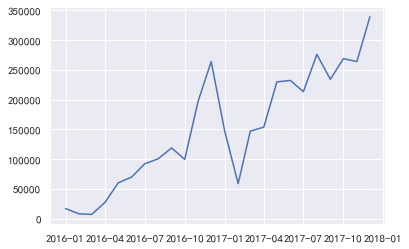

In [59]:
#11
cc4["订单日期"] = pd.to_datetime(cc4["订单日期"])
cc4["月"]=cc4["订单日期"].values.astype('datetime64[M]')

cc4["总金额"]=cc4["数量"]*cc4["销售额"]

plt.plot(cc4.groupby("月")["总金额"].sum().index, cc4.groupby("月")["总金额"].sum())
plt.show()

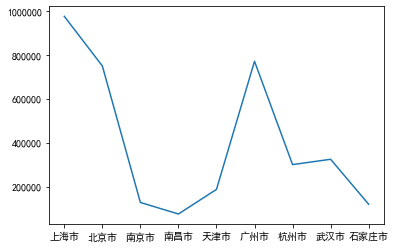

In [43]:

plt.plot(cc4.groupby("客户城市")["总金额"].sum().index, cc4.groupby("客户城市")["总金额"].sum())
plt.show()

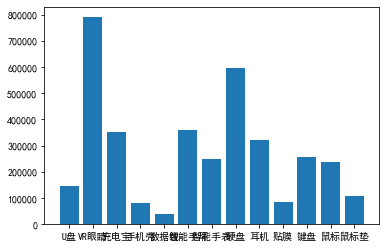

In [44]:
#10
plt.bar(cc4.groupby("产品名称")["总金额"].sum().index, cc4.groupby("产品名称")["总金额"].sum())
plt.show()


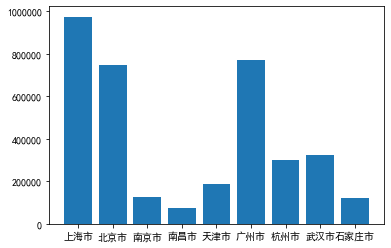

In [45]:
plt.bar(cc4.groupby("客户城市")["总金额"].sum().index, cc4.groupby("客户城市")["总金额"].sum())
plt.show()


In [59]:
cc4

,订单日期,订单号,产品名称,客户姓名,客户城市,发货日期,数量,销售额,单价,毛利,利润,月,总金额,日
0,2016-01-01,xs000001,鼠标垫,郑石,北京市,2016/1/3,2,138,69,30,60,2016-01-01,276,2016-01-01
1,2016-01-01,xs000001,耳机,吴雷,北京市,2016/1/1,1,109,109,20,20,2016-01-01,109,2016-01-01
2,2016-01-02,xs000002,U盘,林永,杭州市,2016/1/3,1,49,49,51,51,2016-01-01,49,2016-01-02
3,2016-01-02,xs000003,耳机,徐雷,上海市,2016/1/2,1,109,109,20,20,2016-01-01,109,2016-01-02
4,2016-01-02,xs000002,数据线,薛平,北京市,2016/1/3,1,19,19,7,7,2016-01-01,19,2016-01-02
5,2016-01-02,xs000003,鼠标,薛鹏,武汉市,2016/1/4,1,78,78,51,51,2016-01-01,78,2016-01-02
6,2016-01-03,xs000027,U盘,孙静,上海市,2016/1/4,1,49,49,20,20,2016-01-01,49,2016-01-03
7,2016-01-03,xs000027,鼠标,郑凡,北京市,2016/1/4,1,78,78,22,22,2016-01-01,78,2016-01-03
8,2016-01-04,xs000028,数据线,赖敏,石家庄市,2016/1/5,2,38,19,53,106,2016-01-01,76,2016-01-04
9,2016-01-04,xs000028,鼠标垫,徐楠,杭州市,2016/1/4,1,69,69,22,22,2016-01-01,69,2016-01-04


In [236]:
cc5

,订单日期,年度,季度,月份,月度,日,年份季度,年度月份,星期
0,2016/1/1,2016,Q1,1,M1,1,2016Q1,201601,5
1,2016/1/2,2016,Q1,1,M1,2,2016Q1,201601,6
2,2016/1/3,2016,Q1,1,M1,3,2016Q1,201601,7
3,2016/1/4,2016,Q1,1,M1,4,2016Q1,201601,1
4,2016/1/5,2016,Q1,1,M1,5,2016Q1,201601,2
5,2016/1/6,2016,Q1,1,M1,6,2016Q1,201601,3
6,2016/1/7,2016,Q1,1,M1,7,2016Q1,201601,4
7,2016/1/8,2016,Q1,1,M1,8,2016Q1,201601,5
8,2016/1/9,2016,Q1,1,M1,9,2016Q1,201601,6
9,2016/1/10,2016,Q1,1,M1,10,2016Q1,201601,7


In [25]:
cc6

,序号,客户城市,产品类别,产品名称,产品代码,零售价,采购价,单位利润,Unnamed: 7
0,1,广州市,手机配件,手机壳,sj001,26.0,12.0,14.0,NaN
1,2,上海市,手机配件,耳机,sj002,109.0,58.0,51.0,NaN
2,3,北京市,手机配件,充电宝,sj003,119.0,66.0,53.0,NaN
3,4,杭州市,手机配件,贴膜,sj004,29.0,10.0,19.0,NaN
4,5,天津市,手机配件,数据线,sj005,19.0,12.0,7.0,NaN
5,6,武汉市,电脑外设,鼠标,dn006,78.0,56.0,22.0,NaN
6,7,南京市,电脑外设,键盘,dn007,85.0,59.0,26.0,NaN
7,8,石家庄市,电脑外设,鼠标垫,dn008,69.0,39.0,30.0,NaN
8,9,南昌市,电脑外设,U盘,dn009,49.0,29.0,20.0,NaN


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21806 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21806 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda\lib\site-packages\matp

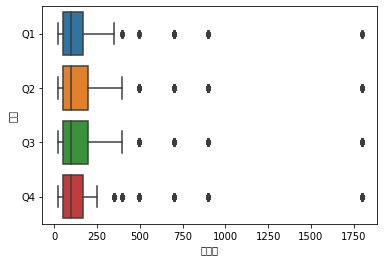

In [3]:
cc13=pd.merge(cc5,cc4,on="订单日期")
cc13=cc13[["订单日期","季度","销售额"]]
sns.boxplot(cc13["销售额"],cc13["季度"])
plt.show()

In [272]:
cc4

,订单日期,订单号,产品名称,客户姓名,客户城市,发货日期,数量,销售额,单价,毛利,利润,月,总金额
0,2016-01-01,xs000001,鼠标垫,郑石,北京市,2016/1/3,2,138,69,30,60,2016-01-01,276
1,2016-01-01,xs000001,耳机,吴雷,北京市,2016/1/1,1,109,109,20,20,2016-01-01,109
2,2016-01-02,xs000002,U盘,林永,杭州市,2016/1/3,1,49,49,51,51,2016-01-01,49
3,2016-01-02,xs000003,耳机,徐雷,上海市,2016/1/2,1,109,109,20,20,2016-01-01,109
4,2016-01-02,xs000002,数据线,薛平,北京市,2016/1/3,1,19,19,7,7,2016-01-01,19
5,2016-01-02,xs000003,鼠标,薛鹏,武汉市,2016/1/4,1,78,78,51,51,2016-01-01,78
6,2016-01-03,xs000027,U盘,孙静,上海市,2016/1/4,1,49,49,20,20,2016-01-01,49
7,2016-01-03,xs000027,鼠标,郑凡,北京市,2016/1/4,1,78,78,22,22,2016-01-01,78
8,2016-01-04,xs000028,数据线,赖敏,石家庄市,2016/1/5,2,38,19,53,106,2016-01-01,76
9,2016-01-04,xs000028,鼠标垫,徐楠,杭州市,2016/1/4,1,69,69,22,22,2016-01-01,69


In [4]:
#13
plt.rc("font",family="SimHei",size="15")  #解决中文乱码问题
cc12=[]
cc10=cc4.groupby("订单日期")["总金额"].sum()
cc10=pd.DataFrame(cc10)
cc10["订单日期"]=cc10.index
cc10['quarter'] = pd.PeriodIndex(cc10.index, freq='Q')
for i in cc10["quarter"].drop_duplicates():
    cc11=cc10.loc[cc10["quarter"]==i]
    cc12.append(cc11)
    print(cc12)
    
    
    
   
    



KeyError: 'Column not found: 总金额'

In [45]:
for k1,k2 in cc20:
    print (k1)
    print (k2)

ValueError: too many values to unpack (expected 2)

In [54]:
cc20=cc4["订单日期"].groupby([cc4["客户城市"],cc4["销售额"]]).sum()

cc20.unstack

<bound method Series.unstack of 客户城市  销售额 
上海市   19      2016/2/132016/3/52016/4/222016/5/252016/5/2620...
      26      2016/1/52016/3/292016/4/12016/4/152016/4/16201...
      29      2016/1/242016/1/262016/3/52016/3/92016/3/26201...
      38      2016/2/122016/5/12016/5/22016/5/102016/5/13201...
      49      2016/1/32016/3/302016/4/42016/4/82016/4/122016...
      52      2016/2/262016/4/272016/5/112016/6/142016/6/182...
      58      2016/1/272016/5/92016/6/142016/6/152016/6/1720...
      69      2016/1/302016/2/252016/2/292016/3/132016/4/420...
      78      2016/1/62016/1/92016/1/172016/1/242016/2/21201...
      85      2016/2/172016/2/272016/3/132016/3/282016/3/292...
      98      2016/4/212016/6/202016/6/292016/7/12016/7/8201...
      109     2016/1/22016/2/72016/3/82016/3/142016/3/292016...
      119     2016/1/262016/2/112016/2/202016/3/82016/3/2220...
      138     2016/1/212016/1/282016/5/32016/6/302016/7/1920...
      156     2016/2/42016/2/192016/5/92016/5/172016/7/10201.

In [57]:
for name, group,dd in cc20:
    print (name)
    print (group)
    print(dd)

ValueError: too many values to unpack (expected 3)